# MNIST dataset classification
- Sem Kieboom
- Abel van Dijk
- Mark Hendrikx
- Luuk Kessels

In dit document, wordt de MNIST dataset geclassificeerd met behulp van verschillende machine learning modellen.




### Imports en setup

In [242]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
# Load dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Verkenning en datavoorbereiding
De data bestaat uit 1797 samples van 8x8 pixels. De target is een getal van 0 tot 9. De data is al in een goede vorm voor machine learning, dus er hoeft niet veel aan gedaan te worden. Ook is er geen sprake van missende data. Ook lijkt de verdeling van de data goed, alle getallen komen ongeveer even vaak voor (9.68% - 10.18%).


In [243]:
print("Num of images, and num of pixels: "+ str(X.shape))
print("Y values: "+str({int(i) for i in set(y)}))
# check how many of each number there are in the dataset in percentages
for i in range(10):
    print(f"{i}: {np.round(len(y[y == i]) / len(y) * 100, 2)}%")


Num of images, and num of pixels: (1797, 64)
Y values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
0: 9.91%
1: 10.13%
2: 9.85%
3: 10.18%
4: 10.07%
5: 10.13%
6: 10.07%
7: 9.96%
8: 9.68%
9: 10.02%


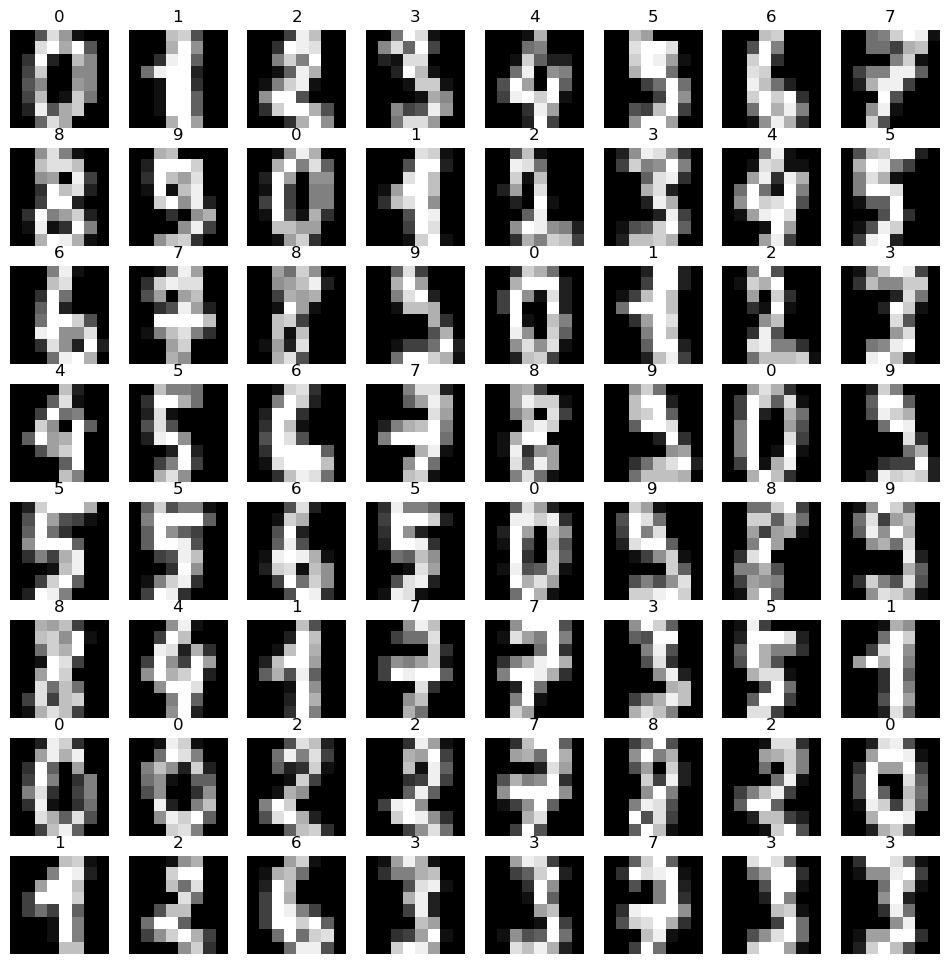

X contains None values:  False
y contains None values:  False
X Contains 0 values:  False


In [244]:
# show the first 64 images with their labels
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

print("X contains None values: ", (X == None).all())
print("y contains None values: ", (y == None).all())
print("X Contains 0 values: ", (X == 0).all())

models = []

## Modelkeuze en implementatie
De volgende modellen kunnen worden gebruikt voor classificatie:

### decision tree
Een decision tree is een veelgebruikt machine learning algoritme, wat een boomstructuur maakt van beslissingen. Het is een goed algoritme om te gebruiken voor simpele classificatie.
- voordelen:
    - makkelijk te begrijpen
    - weinig data voorbereiding nodig
    - kan zowel classificatie als regressie doen
- nadelen:
    - kan overfitten, vooral bij complexere trees
    - duurder om te trainen dan andere algoritmes
https://www.ibm.com/think/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes

### random forest

Random forest is een veelgebruikt machine learning algoritme, wat de output van meerdere decision trees combineert. Omdat het zowel classificatie als regressie kan doen, is het een flexibele keuze.
- voordelen:
    - kan overfitten voorkomen,
    - kan zowel classificatie als regressie doen
    - makkelijk om feature importance te berekenen
- nadelen:
    - duurder om te trainen dan decision trees
    - moeilijker te begrijpen dan decision trees, omdat het meerdere trees combineert

https://www.ibm.com/think/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems

### logistic regression

Logistic regression is een veelgebruikt machine learning algoritme, het berekend de kans dat een input bij een bepaalde classificatie hoort. Het is een goed algoritme om te gebruiken voor classificatie.
- voordelen:
    - Werkt goed als de dataset 'linearly separable' is (de data kan in een rechte lijn gescheiden worden)
    - Minder gevoelig voor overfitting (wel vatbaar voor overfitting in datasets met veel features)
    - Makkelijk te implementeren en te begrijpen, efficient om te trainen

- nadelen:
    - Kan niet goed omgaan met non-lineaire data
    - Kan niet goed omgaan met veel features, vooral als er meer features zijn dan observaties
    - Kan alleen binair classificeren

https://www.ibm.com/think/topics/logistic-regression https://medium.com/@akshayjain_757396/advantages-and-disadvantages-of-logistic-regression-in-machine-learning-a6a247e42b20

### k-nearest neighbors

K-nearest neighbors is een veelgebruikt machine learning algoritme, wat de classificatie van een input bepaald door te kijken naar de classificatie van de 'k' dichtsbijzijnde punten.
- voordelen:
    - makkelijk te begrijpen en te implementeren
    - past makkelijk aan aan nieuwe data

- nadelen:
    - Schaalt niet goed op (gebruikt meer geheugen en rekenkracht naarmate de dataset groter wordt)
    - Werkt niet goed op datasets met veel features
    - Gevoelig voor overfitting (vooral bij een lage k-waarde)

https://www.ibm.com/think/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today




### Decision tree classifier

In [245]:
 #create a classifier using the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
accuracy_score(y_test, y_pred_dt)
print(accuracy_score(y_test, y_pred_dt))
models.append(decision_tree)


0.8833333333333333


### Random forest classifier

In [246]:
# model
rnd_forest_model = RandomForestClassifier()

# training
rnd_forest_model.fit(x_train, y_train)

# predict
y_pred_reg = rnd_forest_model.predict(x_test)

# accuracy_score
accuracy_score(y_test, y_pred_reg)
print(accuracy_score(y_test, y_pred_reg))

models.append(rnd_forest_model)

0.9722222222222222


### Logistic regression classifier


In [247]:
log_regression_model = LogisticRegression(max_iter=5000)

log_regression_model.fit(x_train, y_train)

y_pred_lr = log_regression_model.predict(x_test)

accuracy_score(y_test, y_pred_lr)
print(accuracy_score(y_test, y_pred_lr))

models.append(log_regression_model)

0.9555555555555556


### K-nearest neighbors classifier

In [248]:
k_nearest_model = KNeighborsClassifier()

k_nearest_model.fit(x_train, y_train)

y_pred_k = k_nearest_model.predict(x_test)

accuracy_score(y_test, y_pred_k)
print(accuracy_score(y_test, y_pred_k))

models.append(k_nearest_model)

0.9861111111111112


Alle modellen lijken redelijk goede scores te halen, rond de 80 tot 99 procent accuraat. Echter kan het zijn dat de modellen overfitten op de data. Om dit te testen hebben we de modellen getest op eigen data.

### Testen op eigen data
We hebben zelf een aantal afbeeldingen gemaakt van de cijfers 0 tot 9. Deze afbeeldingen zijn 16x16 pixels groot en zijn in het zwart-wit. We hebben deze afbeeldingen omgezet naar 8x8 pixels, een numpy array en deze genormaliseerd naar een schaal van 0 tot 16. Ook hebben we de afbeeldingen omgedraaid, omdat de MNIST dataset de afbeeldingen in de dataset ook omgedraaid heeft. Met eigen data, lijkt de K-nearest neighbour classifier het beste te presteren, gevolgd door de Logistic regression. De Random forest classifier, en de Decision tree classifier presteren minder goed.

Model: DecisionTreeClassifier() Correct: 1/10


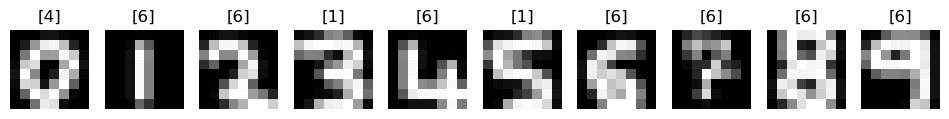


Model: RandomForestClassifier() Correct: 2/10


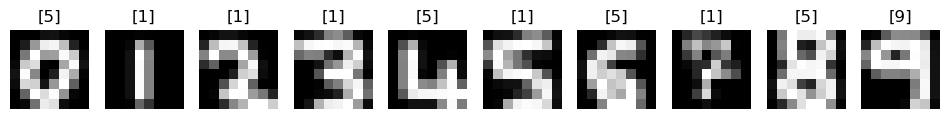


Model: LogisticRegression(max_iter=5000) Correct: 5/10


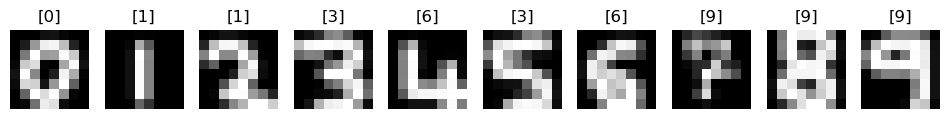


Model: KNeighborsClassifier() Correct: 6/10


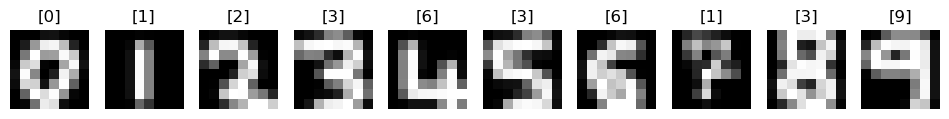

In [249]:
images = []
for i in range(10):
    image = Image.open(f'{i}.png').convert('L')
    image = image.resize((8, 8))  # Resize to 8x8 pixels
    image_array = np.array(image).reshape(1, 64)
    # normalize the 0-255 values to 0-16
    image_array = image_array / 16
    # flip the image to match the MNIST dataset
    image_array = 1 - image_array
    images.append(image_array)

for model in models:
    correct = 0
    for i in range(10):
        if model.predict(images[i]) == i:
            correct += 1
    print(f"Model: {model} Correct: {correct}/10")
    plt.figure(figsize=(12, 12))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(model.predict(images[i]))
        plt.axis('off')
    plt.show()
    print()
    correct = 0

## Model evaluatie
Er zijn twee modellen die er boven uit springen, Logistic regression, en K-nearest neighbour. Wat opvalt, is dat de tree, en random forest classifiers zelfs de 'simpele' getallen 0 en 1, vaak verkeerd classificeren.
In het volgende hoofdstuk worden de classifiers geoptimaliseerd, om de extra data beter te classificeren. De code staat in comments, omdat het veel tijd kost om te runnen. In de markdown cellen onder de code, staat de output van de code.

### Decision tree classifier
De decision tree classifier presteert het slechtst van de vier modellen. Het model lijkt redelijk te werken op de test set, maar presteert slecht op de eigen data. Dit kan betekenen dat het model niet voldoende generaliseert en overfit op de data. Volgens Tilburg Science Hub https://tilburgsciencehub.com/topics/analyze/machine-learning/supervised/decision_trees/#:~:text=A%20standard%20method%20for%20addressing,using%20a%20decision%20tree%20algorithm. kan dit probleem worden opgelost door de hyperparameters van het model te optimaliseren. Namelijk:
- Maximale diepte van de boom reduceren
- Minimaal aantal samples per leaf verhogen
- Minimaal aantal samples per split verhogen
- Maximaal aantal leaf nodes reduceren
- Maximaal aantal features features voor het maken van een split reduceren

het volgende blok code, test de decision tree classifier met verschillende hyperparameters, en kiest de classifier met de beste score op de eigen data. Zelfs met deze optimalisatie, presteert de decision tree classifier nog steeds slechter dan de andere modellen. Daarom is het beter om een ander model te kiezen.





In [250]:
print(f'Depth of the tree: {decision_tree.get_depth()}')
print(f'Number of leaves: {decision_tree.get_n_leaves()}')
print(f'Number of nodes: {decision_tree.tree_.node_count}')

param_grid = {
    'max_depth': [None, 5,6,7,8,9,10,11,13,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [None, 50,80, 100, 120, 140, 150],
}

def evaluate_on_extra_data(model, images):
    correct = 0
    for i in range(10):
        if model.predict(images[i]) == i:
            correct += 1
    return correct


# Train multiple trees and select the best one
best_score = 0
best_tree = None

# for max_depth in param_grid['max_depth']:
#     for min_samples_split in param_grid['min_samples_split']:
#         for min_samples_leaf in param_grid['min_samples_leaf']:
#             for max_leaf_nodes in param_grid['max_leaf_nodes']:
#                 # Create and train the Decision Tree
#                 decision_tree = DecisionTreeClassifier(
#                     max_depth=max_depth,
#                     min_samples_split=min_samples_split,
#                     min_samples_leaf=min_samples_leaf,
#                     max_leaf_nodes=max_leaf_nodes,
#                 )
#                 decision_tree.fit(x_train, y_train)
#
#                 # Evaluate the tree on extra data
#                 score = evaluate_on_extra_data(decision_tree, images)
#
#                 # Update the best tree if the current one is better
#                 if score > best_score:
#                     best_score = score
#                     best_tree = decision_tree
#
# # Print the best tree and its score
# print(f'Best Decision Tree: {best_tree}')
# print(f'Correct predictions on extra data: {best_score}/10')


Depth of the tree: 13
Number of leaves: 135
Number of nodes: 269


Output:
```
Depth of the tree: 14
Number of leaves: 138
Number of nodes: 275
Best Decision Tree: DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=2)
Correct predictions on extra data: 1/10
```

### Random forest classifier
De random forest classifier presteert iets beter dan de decision tree classifier, maar nog steeds slechter dan de logistic regression en k-nearest neighbors. Het model lijkt redelijk te werken op de test set, maar presteert slecht op de eigen data. Dit kan betekenen dat het model niet voldoende generaliseert en overfit op de data. Zoals bij de decusion tree classifier, kunnen de hyperparameters aangepast worden om het model te optimaliseren. Echter, zelfs met deze optimalisatie, presteert de random forest classifier nog steeds slechter dan de andere modellen. Daarom is het beter om een ander model te kiezen.

De beste random forest classifier heeft een score van 5/10 op de eigen data, wat beter lijkt te zijn dan de decision tree classifier, maar nog steeds slechter dan de logistic regression en k-nearest neighbors. Daarom is het beter om een ander model te kiezen.


In [251]:
print(f'Number of trees: {rnd_forest_model.n_estimators}')
print(f'Max depth of the trees: {rnd_forest_model.max_depth}')
print(f'Min samples split: {rnd_forest_model.min_samples_split}')
print(f'Min samples leaf: {rnd_forest_model.min_samples_leaf}')
print(f'Max leaf nodes: {rnd_forest_model.max_leaf_nodes}')


param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5,6,7,8,9,10,11,13,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [None, 50,80, 100, 120, 140, 150],
}

# Train multiple trees and select the best one
best_score = 0
best_tree = None

# for n_estimators in param_grid['n_estimators']:
#     for max_depth in param_grid['max_depth']:
#         for min_samples_split in param_grid['min_samples_split']:
#             for min_samples_leaf in param_grid['min_samples_leaf']:
#                 for max_leaf_nodes in param_grid['max_leaf_nodes']:
#                     # Create and train the Decision Tree
#                     rnd_forest_model = RandomForestClassifier(
#                         n_estimators=n_estimators,
#                         max_depth=max_depth,
#                         min_samples_split=min_samples_split,
#                         min_samples_leaf=min_samples_leaf,
#                         max_leaf_nodes=max_leaf_nodes,
#                     )
#                     rnd_forest_model.fit(x_train, y_train)
#
#                     # Evaluate the tree on extra data
#                     score = evaluate_on_extra_data(rnd_forest_model, images)
#
#                     # Update the best tree if the current one is better
#                     if score > best_score:
#                         best_score = score
#                         best_tree = rnd_forest_model
#
# # Print the best tree and its score
# print(f'Best Decision Tree: {best_tree}')
# print(f'Correct predictions on extra data: {best_score}/10')

Number of trees: 100
Max depth of the trees: None
Min samples split: 2
Min samples leaf: 1
Max leaf nodes: None


Output:
```
Number of trees: 100
Max depth of the trees: None
Min samples split: 2
Min samples leaf: 1
Max leaf nodes: None
Best Decision Tree: RandomForestClassifier(max_depth=9, max_leaf_nodes=50, min_samples_leaf=3,
                       n_estimators=10)
Correct predictions on extra data: 5/10
```


## Optimalisatie en verbeteringen

## Explainable AI (XAI) analyse

## Conlusie en reflectie